# EDA/insights into the crossing-books datasets

In [565]:
import numpy as np
from scipy.stats import skew
import statistics as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

sns.set()
plt.rcParams["figure.figsize"] = (17,3)

In [566]:
## consideration of "bad lines" is important and it basically stands for 
## a csv line with too many commas, which the case here. 
##If not addressed to many incorrect data entry

col_names = ["User-ID", "ISBN","Book-Rating"]
df_ranking = pd.read_csv('BX-CSV-Dump/BX-Book-ratings.csv', delimiter = ";", error_bad_lines=False, low_memory=False, encoding='ISO-8859–1')
df_ranking.columns = col_names

col_names = ["User-ID","Location","Age"]
df_users = pd.read_csv('BX-CSV-Dump/BX-Users.csv', delimiter = ";", error_bad_lines=False, low_memory=False, encoding='ISO-8859–1')
df_users.columns = col_names

col_names = ["ISBN","Book-Title","Book-Author","Year-Of-Publication","Publisher","Image-URL-S","Image-URL-M","Image-URL-L"]
df_books = pd.read_csv("BX-CSV-Dump/BX-Books.csv", sep=';', error_bad_lines=False, low_memory=False, encoding='ISO-8859–1')
df_books.columns = col_names







b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


## Data cleaning

In [567]:
# data.isnull() # shows a df with the information whether a data point is null 

print(df_books.isnull().sum())
print('\n')
print(df_users.isnull().sum())
print('\n')
print(df_ranking.isnull().sum())

# quite much nans for age column
# and also publisher and book author to check

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


User-ID          0
Location         0
Age         110762
dtype: int64


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


## exploring users

In [568]:
# exploring  datasets

print(df_users.head(10))

## it would be wise do consider location entries seprately
## for the future model to recommend books based on city, district/state, country in a separate way
## since sometimes it makes much more sense taking into the account whole country
## rather than some city in there provided that some countries are not diverse and different in either location

# split column into multiple columns by delimiter 
df_users_locations = df_users['Location'].str.split(',', n = 2, expand=True)
df_users_locations.columns = ['city', 'state/district', 'country']
df_users = pd.concat([df_users, df_users_locations], sort=False, axis = 1)




   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
5        6       santa monica, california, usa  61.0
6        7                 washington, dc, usa   NaN
7        8            timmins, ontario, canada   NaN
8        9          germantown, tennessee, usa   NaN
9       10          albacete, wisconsin, spain  26.0


In [569]:
## what about age column? There seemed to be a lot of unknowns
## let's explore what is inside

df_users['Age'].unique()

## age of ~95+ and 6<  seems to be incorrect

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [570]:
df_users.loc[(df_users['Age'] > 95) | (df_users['Age'] < 6) ,'Age'] = np.NAN
df_users['Age'].isnull().sum()

# almost 112 k nans for user ages, we might
# use central tendecies such as average age of people
# based on country, region
# as for the future models to be improved


112055

In [571]:
df_ranking.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [572]:
# data.isnull() # shows a df with the information whether a data point is null 

print(df_books.isnull().sum())
print('\n')
print(df_users.isnull().sum())
print('\n')
print(df_ranking.isnull().sum())

# quite much nans for age column
# also publisher and book authors to be chekhed

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


User-ID                0
Location               0
Age               112055
city                   0
state/district         1
country                2
dtype: int64


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


## books dataset 

In [573]:
## in the book dataset description it was noted that 
## Books are identified by their respective ISBN. 
## Invalid ISBNs have already been removed from the dataset, therefore no need to check them

# as it was noted in the forums, there are issues with year of publication due to incorrent entry
# let's see what is going on there

df_books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [574]:
## it's particually interesing what is the exact issue of the row that contain 
## 'DK Publishing Inc', 'Gallimard', and 0 in the year column
## to decide whethwe we should remove them or there is a chance of fixing it
options = ['DK Publishing Inc', 'Gallimard']
  
# selecting rows based on condition


pd.set_option("display.max_colwidth", None)
df_books[df_books['Year-Of-Publication'].isin(options)]



# seems like there was a shift, also not that book author is in book title

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [575]:
df_books.loc[df_books.index == 209538, "Book-Title"] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
df_books.loc[df_books.index == 209538, "Year-Of-Publication"] = "2000"
df_books.loc[df_books.index == 209538, "Book-Author"] = "Michael Teitelbaum"
df_books.loc[df_books.index == 209538, "Publisher"] = "DK Publishing Inc"
# now it seems to be quite right

df_books[df_books.index == 209538]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN


In [576]:
df_books.loc[df_books.index == 220731, "Book-Title"] = "Peuple du ciel, suivi de 'Les Bergers"
df_books.loc[df_books.index == 220731, "Year-Of-Publication"] = "2003"

# something weird in the name, probably need to chance encode
df_books.loc[df_books.index == 220731, "Book-Author"] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.index == 220731, "Publisher"] = 'Gallimard'

df_books[df_books.index == 220731]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [577]:
df_books.loc[df_books.index == 221678, "Book-Title"] = "Peuple du ciel, suivi de 'Les Bergers"
df_books.loc[df_books.index == 221678, "Year-Of-Publication"] = "2003"

# something weird in the name, probably need to chance encode
df_books.loc[df_books.index == 221678, "Book-Author"] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.index == 221678, "Publisher"] = 'DK Publishing Inc'

df_books[df_books.index == 220731]



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [578]:
## seems to be better with an exception of 0, and 2022+ years
## I assume this issue can be addressed in the future
## for now I am going to keep it as nan

# df_books[(df_books['Year-Of-Publication']>'2022') or (df_books['Year-Of-Publication']==0)] = np.nan
df_books.loc[(df_books['Year-Of-Publication']>'2022') | (df_books['Year-Of-Publication']=='0'), 'Year-Of-Publication'] = np.nan

# converting to date-time convert to allow future interactions
df_books['Year-Of-Publication'] = pd.to_datetime(df_books['Year-Of-Publication'], format='%Y', errors = 'coerce')



df_books.columns



Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [580]:
## REMINDER

# data.isnull() # shows a df with the information whether a data point is null 

print(df_books.isnull().sum())

# and also publisher and book author to check

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication    4633
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64


In [581]:
df_books[df_books['Book-Author'].isnull()]

# since it's just one entry, one can find the missing value by simple google search
# it was Larissa Anne Downes

df_books.loc[df_books.index == 187689, "Book-Author"] = "Larissa Anne Downes"

# what about publishers, 2 values are missing
df_books[df_books['Publisher'].isnull()]

# seems like we will not be able to find it within database,
# therefore we can refer to to the book using ISBN and year of publication
# NovelBooks, Inc., CreateSpace for id = 128890 and 129037 respectively

df_books.loc[df_books.index == 128890, "Publisher"] = "NovelBooks, Inc."
df_books.loc[df_books.index == 129037, 'Publisher'] = 'CreateSpace'
df_books.loc[(df_books.index == 128890) | (df_books.index == 129037)]

# Done!

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002-01-01,"NovelBooks, Inc.",http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001-01-01,CreateSpace,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


## Ranking dataset

In [582]:
# Dataset exploration

df_ranking.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [583]:
print(df_ranking.head())

# ranking is "central" dataset that will be used to create
# recommendation system
# therefore, we need consistency in users and books
# meaning there should be no books that are not in original books dataset
# and no users that are not in original users dataset
# to make recommendation system use every piece of information
# that containt all 3 datasets


df_ranking_filtered_1 = df_ranking[df_ranking['ISBN'].isin(df_books['ISBN'])]
df_ranking_filtered_2 = df_ranking_filtered_1[df_ranking_filtered_1['User-ID'].isin(df_users['User-ID'])]
df_ranking_filtered_1.head()

print(len(df_ranking) - len(df_ranking_filtered_1))

# 118644 ranking has no ISBN information in books dataset
# meaning we loose valuable infroamtion such as year, publisher and title


df_ranking_filtered_2.head()


   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6
118644


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Insights of datasets

In [584]:
number_of_ratings_by_user = df_ranking_filtered_2.groupby(["User-ID"])['Book-Rating'].count()
print(number_of_ratings_by_user.describe(include='all'))

# seems like on average each user provides with ~11 book evaluations
# however it's makes it harder for the model 
# to learn when there is not much information about information about particuler users
# say we want all users to provide their opnition about ~5 books at least
# but it's not always the case

print(f"Total numbers of users that rated book {len(df_ranking_filtered_2['User-ID'].unique())}")
print(f'Number of users that rated at least 5 books is {len(number_of_ratings_by_user[number_of_ratings_by_user.values>5])}')
print(f'Number of users that rated at least 3 books is {len(number_of_ratings_by_user[number_of_ratings_by_user.values>3])} ')

count    92106.000000
mean        11.195101
std         88.685678
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max      11144.000000
Name: Book-Rating, dtype: float64
Total numbers of users that rated book 92106
Number of users that rated at least 5 books is 17714
Number of users that rated at least 3 books is 24268 


In [585]:
number_of_ratings_by_book = df_ranking_filtered_2.groupby(["ISBN"])['Book-Rating'].count()
print(number_of_ratings_by_book.describe(include='all'))

# each books was rated ~3 times in average

# here we want the same
# as many ratings assigned by users as possible
# let's see how many books were rated at least 5 times


print(f"Total numbers of books that was rated at least once {len(df_ranking_filtered_2['ISBN'].unique())}")
print(f'Books that were rated by at least 5 users  {number_of_ratings_by_book[number_of_ratings_by_book.values>5].count()}')

# it's impotant factor in content based recommendation systems



count    270151.000000
mean          3.816888
std          13.811690
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: Book-Rating, dtype: float64
Total numbers of books that was rated at least once 270151
Books that were rated by at least 5 users  32737


In [586]:
df_ranking_filtered_2['Book-Rating'].unique()

## let's see what average per book looks like

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

In [587]:
df_average_rating = df_ranking_filtered_2.groupby(['ISBN'])['Book-Rating'].agg('mean')
df_average_rating = df_average_rating.sort_values(ascending = False)
df_average_rating.head()

df_average_rating.head(3).index.to_list()


print('Books with the highest average rating: \n')
for book_code in df_average_rating.head(3).index.to_list():
    
    print(df_books.loc[df_books['ISBN'] == book_code, 'Book-Title'].iloc[0])
    


Books with the highest average rating: 

To The Rescue (Move and Play)
Prometheus Bound (Greek Tragedy in New Translations)
Dinosaurs: A Celebration


<AxesSubplot:title={'center':'Total rating'}>

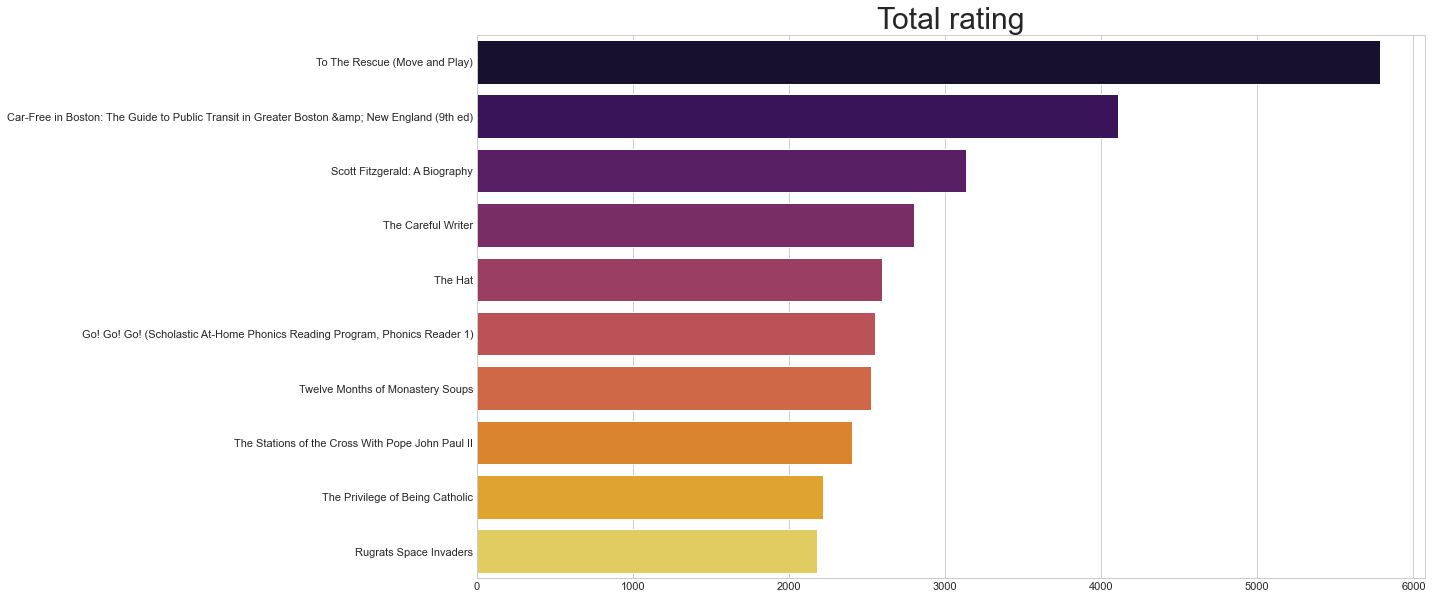

In [595]:
df_total_clicked = df_ranking_filtered_2.groupby(['ISBN'])['Book-Rating'].agg('sum')
df_total_clicked = df_total_clicked.sort_values(ascending = False)
total_rated = df_total_cliked.head(10).index.to_list()

names = []
for book_code in total_rated:
    
    names.append(df_books.loc[df_books['ISBN'] == book_code, 'Book-Title'].iloc[0])

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(17, 10))
plt.title('Total rating', fontsize = 30)
sns.barplot(x = df_total_clicked.head(10).values, y = names, palette='inferno')

<AxesSubplot:>

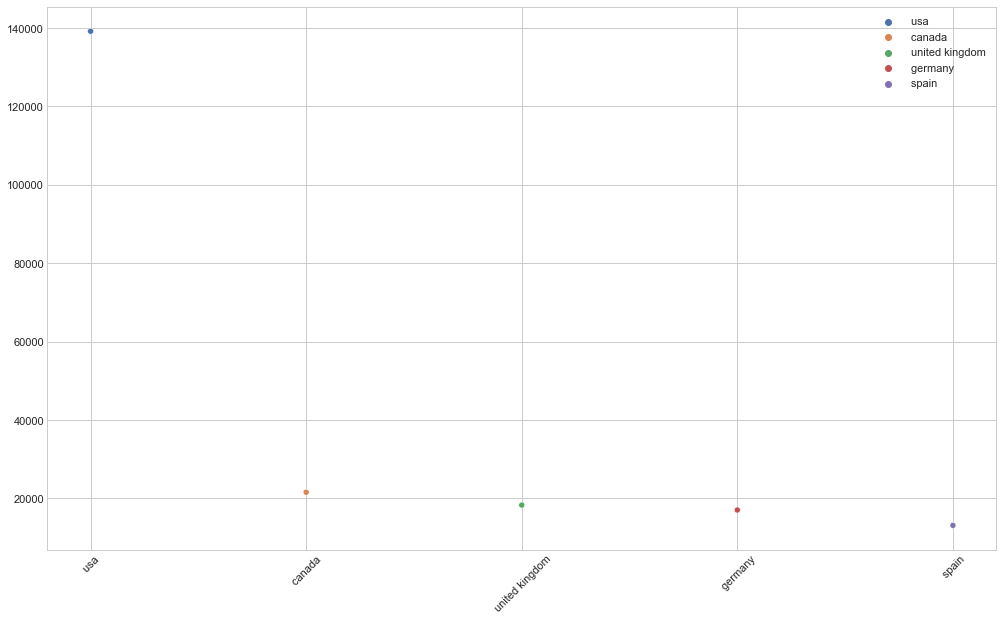

In [589]:
df_top_countries = df_users['country'].value_counts()
df_top_countries = df_top_countries.sort_values(ascending = False)

top_10_countries = df_top_countries.index[0:5]
top_10_countries_counts = df_top_countries.values[0:5]

plt.figure(figsize=(17,10))
plt.xticks(rotation=45)
sns.scatterplot(x=top_10_countries, 
                y=top_10_countries_counts,
                hue=top_10_countries,
                )

# Lots of reviews are coming from US - almost 140000 reviews,
# right after Canada, UK Germany and Spain with a values
# that reaches almost up to 20k

## Building baselines AND application of ML models discussed in the slides

Baselines to be constructed: 
* "Most popular"
* A basic content filtering model
* Collaborative filtering models based on the KNN
* SVD++ models.